# Use-case: Iris Flower Classification

Create a model that can classify iris flower based on the characteristics of the flower

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# Check whether the given dataset is a balanced dataset

data.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [6]:
features = data.iloc[:,[0,1,2,3]].values
label = data.iloc[:,4].values

In [7]:
CL = 0.9
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

for rs in range(1,151):
  X_train,X_test,y_train,y_test = train_test_split(features,
                                                 label,
                                                 test_size=0.2,
                                                 random_state=rs)

  model = LogisticRegression()
  model.fit(X_train,y_train)

  testScore = model.score(X_test,y_test)
  trainScore = model.score(X_train,y_train)

  if testScore > trainScore and testScore >= CL:
    print("Test Score is {} and Train Score is {} in RS value {}".format(testScore,trainScore,rs))
    break

Test Score is 1.0 and Train Score is 0.9666666666666667 in RS value 3


In [8]:
from typing_extensions import final
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

CL = 0.2

bestTestScore = 1
finalTrainScore = 1
finalRs = 1

for rs in range(1,50):
  X_train,X_test,y_train,y_test=train_test_split(features,
                                                 label,
                                                 test_size=0.2,
                                                 random_state=rs)

  model = LogisticRegression()
  model.fit(X_train,y_train)

  trainScore = model.score(X_train,y_train)
  testScore = model.score(X_test,y_test)

  if testScore > trainScore and testScore >= CL:
    if(testScore < bestTestScore):
      bestTestScore = testScore
      finalTrainScore = trainScore
      finalRs = rs
    #print("TestScore {} TrainScore {} Rs {}".format(testScore,trainScore,rs))

print("bestTestScore {} FinalTrainScore {} finalRs {}".format(bestTestScore,finalTrainScore,finalRs))


bestTestScore 0.9666666666666667 FinalTrainScore 0.9583333333333334 finalRs 26


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                 label,
                                                 test_size=0.2,
                                                 random_state=3)

In [10]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [11]:
testScore = model.score(X_test,y_test)
trainScore = model.score(X_train,y_train)

print(f"TestScore : {testScore} , TrainScore: {trainScore}")

TestScore : 1.0 , TrainScore: 0.9666666666666667


In [12]:
model.predict(X_test)

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'versicolor', 'virginica', 'virginica', 'setosa', 'virginica',
       'virginica', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'versicolor'],
      dtype=object)

In [13]:
from sklearn.multiclass import OneVsRestClassifier
#from sklearn.ensemble import XGBClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt 

In [14]:
#Random Forest Classifier
#because we are dealing with multiclass data and so, the one versus rest strategy is used.
#learn to predict each class against the other.
from xgboost import XGBClassifier

X_train,X_test,y_train,y_test = train_test_split(features,
                                                 label,
                                                 test_size=0.2,
                                                 random_state=43)

RF=OneVsRestClassifier(LogisticRegression())
RF.fit(X_train,y_train)
y_pred =RF.predict(X_test)
pred_prob = RF.predict_proba(X_test)

In [15]:
from sklearn.preprocessing import label_binarize
#binarize the y_values

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = label.shape
print(n_class)


(150,)


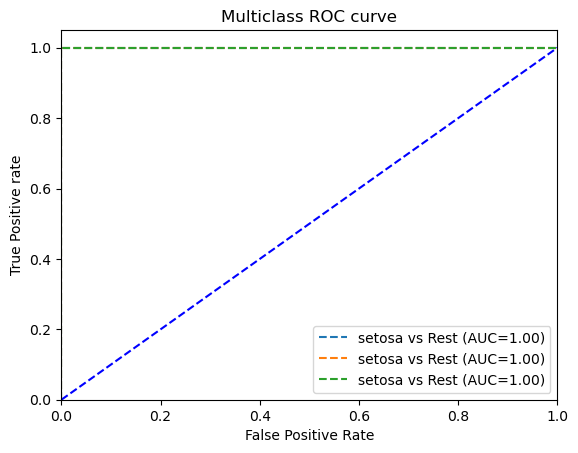

In [16]:
for i in range(0,3):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(label[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [16]:
model.predict_proba(X_test)

array([[9.81011213e-01, 1.89887344e-02, 5.26255053e-08],
       [9.73707101e-01, 2.62927994e-02, 9.95829642e-08],
       [9.60044173e-01, 3.99556712e-02, 1.55366628e-07],
       [9.48555417e-01, 5.14443636e-02, 2.18995653e-07],
       [9.82821738e-01, 1.71782226e-02, 3.92030326e-08],
       [7.89285845e-09, 1.39543932e-03, 9.98604553e-01],
       [2.48655304e-02, 9.25071747e-01, 5.00627221e-02],
       [9.84479184e-01, 1.55207641e-02, 5.19803488e-08],
       [5.24498612e-05, 9.53222146e-02, 9.04625336e-01],
       [6.60968981e-03, 9.08729097e-01, 8.46612135e-02],
       [3.19772570e-02, 9.16809410e-01, 5.12133332e-02],
       [9.83977512e-01, 1.60224475e-02, 4.02308864e-08],
       [2.21717799e-02, 9.45269611e-01, 3.25586088e-02],
       [1.98132666e-02, 9.26045968e-01, 5.41407652e-02],
       [1.13761084e-05, 2.71972247e-02, 9.72791399e-01],
       [9.83989982e-01, 1.60099860e-02, 3.22678918e-08],
       [9.96318882e-04, 5.76549288e-01, 4.22454393e-01],
       [7.38127606e-07, 1.43586

In [26]:
#Plot ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
#Step1:  Extract the prob value of 1
probabilityValues = model.predict_proba(X_test)
probabilityValues

array([[9.81011213e-01, 1.89887344e-02, 5.26255053e-08],
       [9.73707101e-01, 2.62927994e-02, 9.95829642e-08],
       [9.60044173e-01, 3.99556712e-02, 1.55366628e-07],
       [9.48555417e-01, 5.14443636e-02, 2.18995653e-07],
       [9.82821738e-01, 1.71782226e-02, 3.92030326e-08],
       [7.89285845e-09, 1.39543932e-03, 9.98604553e-01],
       [2.48655304e-02, 9.25071747e-01, 5.00627221e-02],
       [9.84479184e-01, 1.55207641e-02, 5.19803488e-08],
       [5.24498612e-05, 9.53222146e-02, 9.04625336e-01],
       [6.60968981e-03, 9.08729097e-01, 8.46612135e-02],
       [3.19772570e-02, 9.16809410e-01, 5.12133332e-02],
       [9.83977512e-01, 1.60224475e-02, 4.02308864e-08],
       [2.21717799e-02, 9.45269611e-01, 3.25586088e-02],
       [1.98132666e-02, 9.26045968e-01, 5.41407652e-02],
       [1.13761084e-05, 2.71972247e-02, 9.72791399e-01],
       [9.83989982e-01, 1.60099860e-02, 3.22678918e-08],
       [9.96318882e-04, 5.76549288e-01, 4.22454393e-01],
       [7.38127606e-07, 1.43586

In [29]:
#Step2: Calc AUC
auc = roc_auc_score(y_test,probabilityValues, multi_class='ovr')
auc

1.0

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(label,model.predict(features))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

In [13]:
from sklearn.metrics import classification_report
print(classification_report(label,model.predict(features)))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.94      0.96        50
   virginica       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

